In [1]:
import math

import pandas as pd

In [2]:
df = pd.read_csv("pres.elect16.results.csv").dropna() # https://github.com/mkearney/presidential_election_county_results_2016

df = df[df["votes"] > 0]
df["fist_digit"] = df["votes"].astype(str).str.slice(start=0, stop=1)

In [3]:
ben = pd.concat(
    [
        df[df["cand"] == "Hillary Clinton"]["fist_digit"]
        .value_counts(normalize=True)
        .sort_index(),
        df[df["cand"] == "Donald Trump"]["fist_digit"]
        .value_counts(normalize=True)
        .sort_index(),
    ],
    axis=1,
)

ben.columns = ["Hillary Clinton", "Donald Trump"]

ben["Benford"] = [math.log10(1 + 1 / n) for n in range(1, 10)]

In [4]:
df[df["cand"] == "Donald Trump"]

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead,fist_digit
160,Los Angeles County,6037,Donald Trump,CA,1.0000,542591.0,2314275.0,0.234454,Hillary Clinton,5
180,Cook County,17031,Donald Trump,IL,0.9746,440213.0,2055215.0,0.214193,Hillary Clinton,4
224,Harris County,48201,Donald Trump,TX,1.0000,544960.0,1302887.0,0.418271,Hillary Clinton,5
227,Maricopa County,4013,Donald Trump,AZ,1.0000,590465.0,1201934.0,0.491262,Donald Trump,5
257,Miami-Dade County,12086,Donald Trump,FL,1.0000,333666.0,978670.0,0.340938,Hillary Clinton,3
...,...,...,...,...,...,...,...,...,...,...
18327,Clark County,16033,Donald Trump,ID,1.0000,203.0,283.0,0.717314,Donald Trump,2
18335,Arthur County,31005,Donald Trump,NE,1.0000,237.0,263.0,0.901141,Donald Trump,2
18340,Kenedy County,48261,Donald Trump,TX,1.0000,84.0,186.0,0.451613,Hillary Clinton,8
18343,King County,48269,Donald Trump,TX,1.0000,149.0,159.0,0.937107,Donald Trump,1


In [5]:
ben

,Hillary Clinton,Donald Trump,Benford
1,0.298939,0.295403,0.301030
2,0.183542,0.158149,0.176091
3,0.132112,0.125040,0.124939
4,0.093860,0.101896,0.096910
5,0.073288,0.091610,0.079181
6,0.063645,0.065252,0.066947
7,0.064288,0.059145,0.057992
8,0.046287,0.056895,0.051153
9,0.044037,0.046609,0.045757


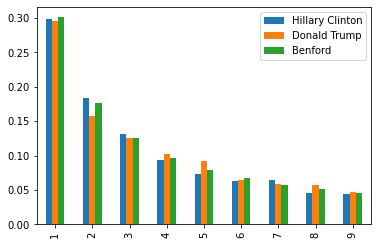

In [6]:
ben.plot.bar();